<a href="https://colab.research.google.com/github/fellippenunes/DSNP-3.0---Modulo-01/blob/main/DSNP_3_0_Analisando_os_Dados_do_Airbnb_(Toronto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0 - Projeto Módulo 01**
*Fellippe Pires Nunes*

---

# Análise dos Dados do Airbnb - Toronto

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto, no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations).*

Importante: O portal está em constante atualização, para evitar que o link deste trabalho quebre, o [conjunto de dados](https://raw.githubusercontent.com/fellippenunes/DSNP3.0/main/listing_toronto.csv) exato utilizado nesse notebook foi copiado para um repositório local. Caso deseje obter informações ainda mais atualizadas sobre a cidade, favor consultar diretamente o [portal](http://insideairbnb.com/get-the-data.html)



Com isso em mente, vamos ao projeto.

<center><img alt="Analisando Airbnb" width="500%" src="https://github.com/fellippenunes/DSNP3.0/raw/main/Toronto_imagens.jpg"></center>



In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/fellippenunes/DSNP3.0/main/listing_toronto.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido para a cidade de Toronto - `vide Q2: análise[21]`
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 10 primeiras entradas.

In [4]:
# mostrar as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,28,7,2017-12-04,0.09,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,94,180,169,2013-08-27,1.56,2,365
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,28,217,2018-10-10,1.79,2,365
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-06-25,0.21,1,159
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,NaN,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,75,30,7,2018-10-17,0.10,1,345
5,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,125,180,1,2010-08-11,0.01,2,365
6,40456,Downtown- King Size Bed and Parking,174063,Denis,NaN,South Parkdale,43.63532,-79.44049,Entire home/apt,100,30,113,2018-08-01,0.92,4,190
7,40701,"Bright Beaches Apt, close to everything",175687,John,NaN,The Beaches,43.67373,-79.28697,Entire home/apt,70,28,1,2013-07-01,0.01,1,55
8,41887,Great location,183071,Kyle,NaN,Oakridge,43.69466,-79.28667,Entire home/apt,70,28,85,2021-02-16,1.59,2,350
9,42892,Downtown 3 Beds 2 Baths @ Union & Harbourfront,187320,Downtown Suite Living,NaN,Waterfront Communities-The Island,43.64451,-79.38185,Entire home/apt,130,89,0,NaN,NaN,8,217


**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb, e possui 15084 linhas e 16 colunas. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa com 30666 entradas e 74 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos de variáveis do DataFrame
display(df.dtypes)

Entradas:	 15084
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 1/4 das linhas.
* As variáveis `name` e `host_name` têm um percentual baixíssimo (abaixo de 0,001%) de valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.230377
last_review                       0.230377
host_name                         0.000464
name                              0.000066
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, a seguir será plotado o histograma.

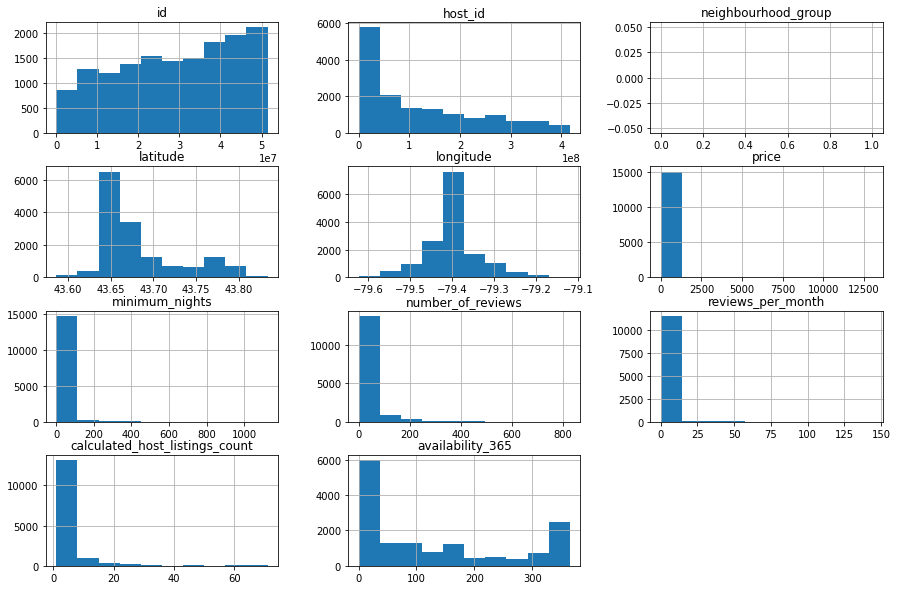

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15084.000000,15084.000000,15084.000000,11609.000000,15084.000000,15084.000000
mean,156.388027,27.427208,25.836847,1.340099,4.329886,128.310130
std,365.588100,39.637649,52.503578,3.584430,8.432275,134.544809
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,28.000000,1.000000,0.160000,1.000000,0.000000
50%,100.000000,28.000000,5.000000,0.510000,1.000000,83.000000
75%,168.000000,28.000000,26.000000,1.430000,4.000000,243.000000
max,13000.000000,1125.000000,828.000000,144.000000,71.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A média do preço da diária na cidade é de 156,00, enquanto o valor máximo pode chegar a 13.000,00
* Há imóveis que estão disponíveis todos os 365 dias por ano, e imóveis cujo menor período para alugar (`minimum_nights`) ultrapassa esse período.

#### Boxplot para minimum_nights


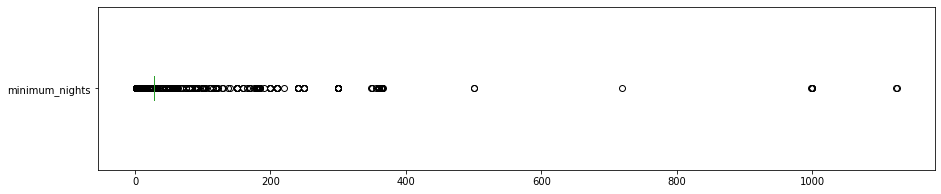

minimum_nights: valores acima de 30:
728 entradas
4.8263%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

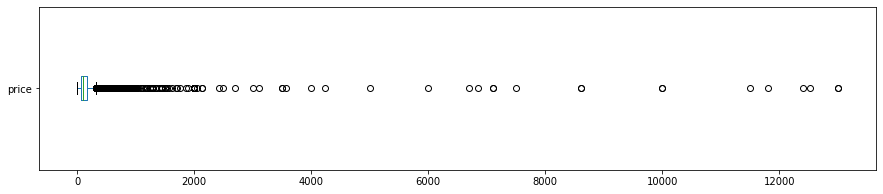


price: valores acima de 2000
30 entradas
0.1989%


In [47]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,2000), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

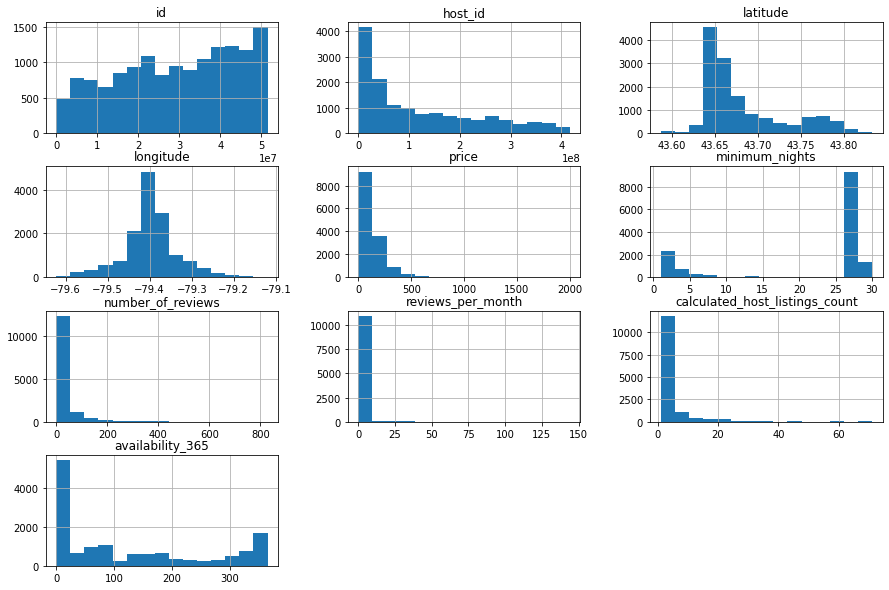

In [34]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.056046,-0.010824,0.026083,0.044709,0.079049
minimum_nights,-0.056046,1.000000,-0.204016,-0.267336,0.002357,-0.112638
number_of_reviews,-0.010824,-0.204016,1.000000,0.335895,-0.064835,0.034418
reviews_per_month,0.026083,-0.267336,0.335895,1.000000,-0.033217,0.016637
calculated_host_listings_count,0.044709,0.002357,-0.064835,-0.033217,1.000000,0.143233
availability_365,0.079049,-0.112638,0.034418,0.016637,0.143233,1.000000


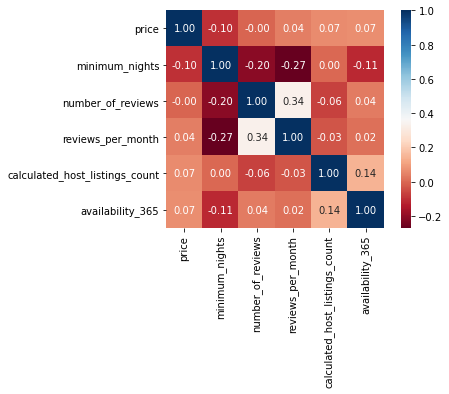

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [31]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9268
Private room       4838
Shared room         180
Hotel room           43
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.646956
Private room       0.337424
Shared room        0.012621
Hotel room         0.002998
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Toronto?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [40]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Rustic                               543.000000
Forest Hill South                    298.526316
Markland Wood                        267.600000
Waterfront Communities-The Island    214.724124
Rosedale-Moore Park                  214.312500
Kingsway South                       210.666667
Leaside-Bennington                   210.064516
New Toronto                          196.301587
Lawrence Park South                  195.068182
Yonge-St.Clair                       187.040000
Name: price, dtype: float64

Como não possuímos conhecimento sobre os bairros de Toronto, foi realizada uma pesquisa em um [blog](https://storeys.com/most-expensive-neighbourhoods-toronto/), que apresentou a lista abaixo. Em negrito, destacamos os bairros que apareceram em nossa análise exploratória: 

* Bridle Path-Sunnybrook-York Mills
* **Forest Hill South**
* **Rosedale-Moore Park**
* Casa Loma 
* St. Andrew-Windfields
* **Yonge-St. Clair**
* Annex
* **Lawrence Park South**
* Bedford Park-Nortown
* Forest Hill North
* **Kingsway South**
* **Leaside**
* Willowdale East
* Banbury-Don Mills
* Yonge-Eglinton


A seguir, buscaremos entender porque *Rustic* aparece como bairro com aluguel mais caro:


In [46]:
# ver quantidade de imóveis no bairro Rustic
print(df_clean[df_clean.neighbourhood == "Rustic"].shape)

# ver as 4 entradas no bairro Rustic
df_clean[df_clean.neighbourhood == "Rustic"]

(4, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7355,29678462,Toronto Multi-unit building,196804491,Alex,Rustic,43.70419,-79.50113,Entire home/apt,2000,28,0,NaN,NaN,1,179
10164,38910564,"Sweet room close , minutes Hwy400&401- 15’ subway",297925924,Hung,Rustic,43.70435,-79.49742,Private room,43,28,7,2021-01-02,0.35,4,89
14789,51070893,Private Unit Toronto close to Airport Free Par...,340663333,Joe,Rustic,43.71240,-79.50473,Entire home/apt,66,2,0,NaN,NaN,3,59
15002,51393322,Newly Renovated Unit Close to Airport FreeParking,340663333,Joe,Rustic,43.71283,-79.50419,Entire home/apt,63,2,0,NaN,NaN,3,58


Pode-se perceber a presença de um outlier nas entradas do bairro Rustic. Um único imóvel possui o custo (price) de **2000**, destoando em relação aos demais preços para o mesmo bairro (média dos demais imóveis: **57,33**)

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

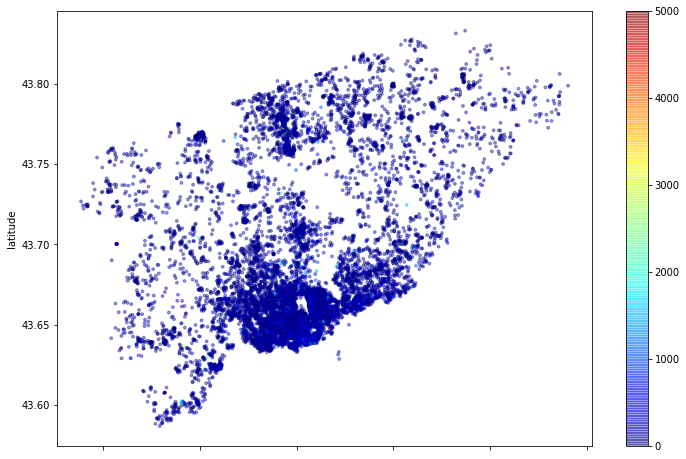

In [25]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Foi feita uma análise superficial dos dados do Airbnb, mas já pudemos notar que os outliers podem nos levar a falsas conclusões. Tivemos o caso do bairro com maior valor de aluguel não figurar entre os bairros mais caros da cidade, segundo nossa pesquisa. Isso ocorreu devido à presença de um outlier cujo valor `price` era quase 20 vezes superior à média naquela localidade, valor esse presente em apenas 0,19% dos imóveis de Toronto. O imóvel em questão não possui nenhuma revisão (`number_of_reviews = 0`), o que é um forte indício de ser um imóvel erroneamente cadastrado no site.

